#Importando as biblíotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 5.5MB 5.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=d5627843d9ecc171d4a94864d02a1236083a9c911bd3d6a4789eb4d953e76a58
  Stored in directory: /tmp/pip-ephem-wheel-cache-bk8c8c71/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web

import seaborn as sns
import matplotlib.pyplot as plt

#Correlação entre duas séries temporais


##Importando os dados

In [ ]:
tickers = ["GOLL4.SA", "AZUL4.SA"]
carteira  = web.get_data_yahoo(tickers, start = '2008-01-01')["Close"]

##Faxinando o banco de dados

In [ ]:
carteira = carteira.dropna()
carteira.columns = ["GOL", "AZUL"]
carteira

,GOL,AZUL
Date,,
2017-04-11,10.300000,22.400000
2017-04-12,9.880000,22.959999
2017-04-13,9.640000,22.990000
2017-04-17,9.980000,22.850000
2017-04-18,10.160000,23.910000
...,...,...
2020-10-05,17.660000,24.309999
2020-10-06,18.950001,25.889999
2020-10-07,18.299999,24.969999


##Visualizando os dados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bfe31f358>,
      dtype=object)

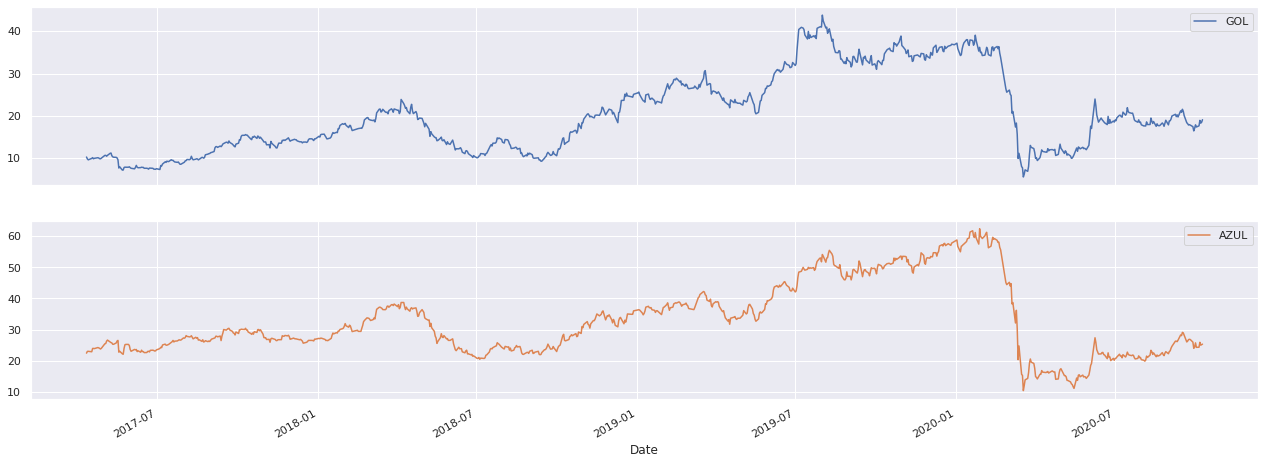

In [ ]:
sns.set()
carteira.plot(subplots= True, figsize=(22,8))

##Correlação de Perason

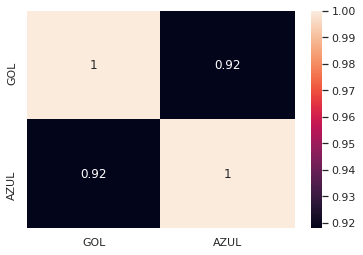

In [ ]:
sns.heatmap(carteira.corr(), annot= True)

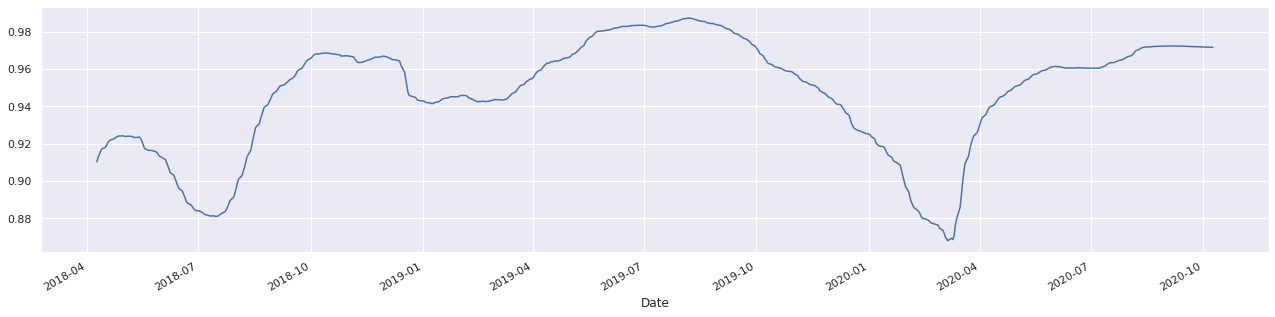

In [ ]:
#Correlação em periodos de 252 dias durante 18 anos 
carteira["GOL"].rolling(252).corr(carteira["AZUL"]).plot(figsize = (22,5))

#Normalizando os dados

In [ ]:
tickers2 = "GOLL4.SA AZUL4.SA"

carteira2 = yf.download(tickers2, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


##Faxinando o DataSet

In [ ]:
#Retirando os NAs
carteira2.dropna(inplace=True)
ibov.dropna(inplace=True)
carteira2.head()

,AZUL4.SA,GOLL4.SA
Date,,
2017-04-11,22.400000,10.30
2017-04-12,22.959999,9.88
2017-04-13,22.990000,9.64
2017-04-17,22.850000,9.98
2017-04-18,23.910000,10.16


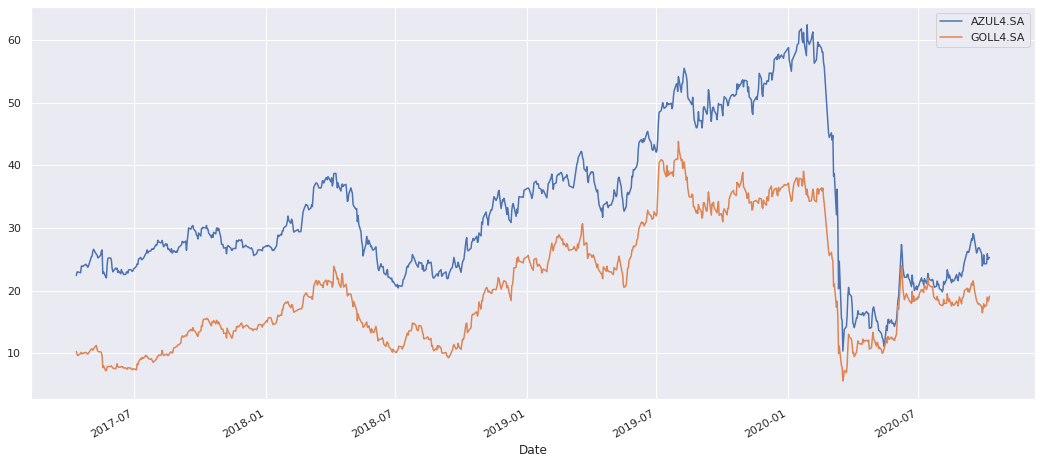

In [ ]:
sns.set()
carteira2.plot(figsize=(18,8));

##Nomalizando a carteira

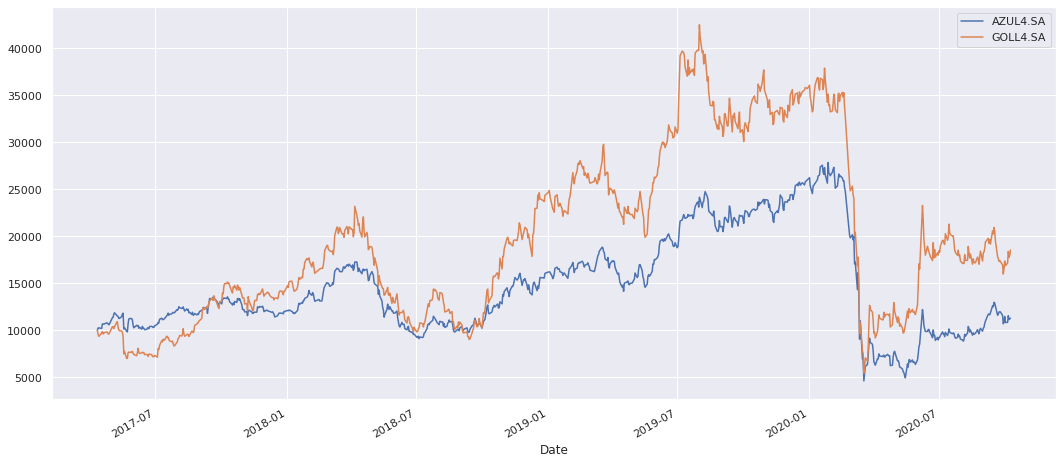

In [ ]:
carteira_normalizada = (carteira2 / carteira2.iloc[0])*10000 #É como se estivessemos comprado R$10.000,00 em ações
carteira_normalizada.dropna(inplace=True) #Tirando os dados faltantes
carteira_normalizada.plot(figsize=(18,8));

In [ ]:
#Criando uma coluna "saldo" para o nosso DataSet
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1) 
carteira_normalizada.tail()

,AZUL4.SA,GOLL4.SA,saldo
Date,,,
2020-10-05,10852.678518,17145.630602,55996.618240
2020-10-06,11558.035639,18398.058652,59912.188582
2020-10-07,11147.321312,17766.989222,57828.621067
2020-10-08,11218.749816,17970.873676,58379.246984
2020-10-09,11294.642709,18553.398307,59696.082032


In [ ]:
#normalizando o indice IBOVESPA
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado.tail() 

Date
2020-10-05    97378.288540
2020-10-06    96897.928574
2020-10-07    96807.734404
2020-10-08    99233.856257
2020-10-09    98790.992744
Name: Adj Close, dtype: float64

##Vamos comparar a nossa carteira com o IBOV

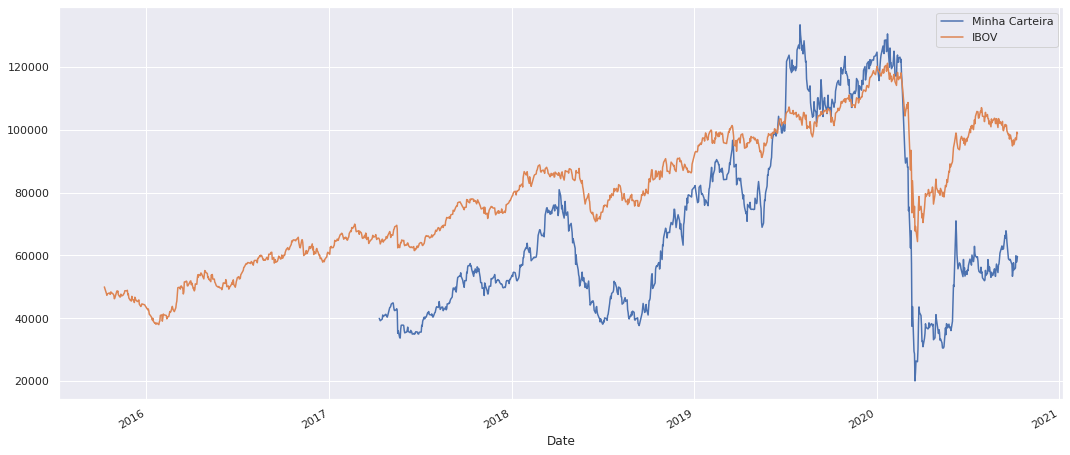

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [ ]:
carteira_normalizada.describe()

,AZUL4.SA,GOLL4.SA,saldo
count,872.000000,872.000000,872.000000
mean,14610.358208,19637.759032,68496.234480
std,5217.022228,9012.831813,27912.414475
min,4620.535963,5436.893011,20114.857948
25%,10695.312461,12135.922105,45760.314997
50%,12890.625220,17791.261621,58355.798196
75%,17075.893148,25635.921596,85538.033603
max,27861.607549,42514.563208,133359.485336
